In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# import datasets
df = pd.read_csv('train.csv.crdownload')
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0.0,2.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0.0,5.0,4.0,9.0,1.0,0.0,0.0,0.0,1.0,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171733,429172,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,11.0,0.0,0.0,1.0,1.0,1.0,0.0
171734,429174,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,9.0,1.0,3.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0
171735,429177,0.0,5.0,1.0,7.0,0.0,6.0,1.0,0.0,0.0,...,5.0,2.0,5.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
171736,429179,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,5.0,1.0,1.0,6.0,0.0,1.0,1.0,1.0,0.0,1.0


In [6]:
df.dropna(axis=0, subset=['target'], inplace=True)
y = df.target
X = df.drop(['target'], axis=1).select_dtypes(exclude=['object'])

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33)

In [8]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression:{:}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression:0.9628753925962522


In [10]:
from sklearn.metrics import classification_report

In [11]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     54570
         1.0       0.00      0.00      0.00      2104

    accuracy                           0.96     56674
   macro avg       0.48      0.50      0.49     56674
weighted avg       0.93      0.96      0.94     56674



C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('COnfusion matrix:\n', confusion_matrix)

COnfusion matrix:
 [[54570     0]
 [ 2104     0]]


In [13]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import f1_score

print('Precision score:', precision_score(y_pred, y_test))
print('Recall score:', recall_score(y_pred, y_test))
print('G-mean score:', geometric_mean_score(y_pred, y_test))
print('F1 score:', f1_score(y_pred, y_test))

Precision score: 0.0
Recall score: 0.0
G-mean score: 0.0
F1 score: 0.0


C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

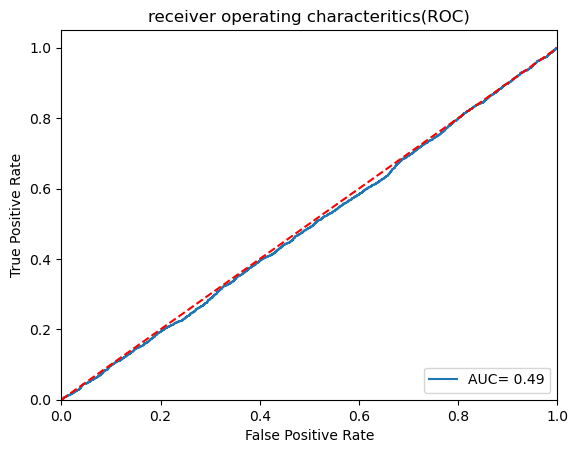

In [15]:
log_roc_auc= roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC= %0.2f' % auc(fpr, tpr))
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('receiver operating characteritics(ROC)')
plt.legend(loc="lower right")
plt.show()

In [16]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resample, y_resample = rus.fit_resample(X,y)
len(X_resample)

12644

In [17]:
from collections import Counter
print(sorted(Counter(y_resample).items()))

[(0.0, 6322), (1.0, 6322)]


In [18]:
X_train, X_test, y_train, y_test= train_test_split(X_resample, y_resample, test_size=0.33)

In [19]:
lr1=LogisticRegression()
lr1.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred1 = lr1.predict(X_test)
print('Accuracy of logistic regression:{:}'.format(lr1.score(X_test, y_test)))

Accuracy of logistic regression:0.5442127965492451


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred1)
print('Confusion matrix:\n', confusion_matrix)

Confusion matrix:
 [[1229  844]
 [1058 1042]]


In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import f1_score

print('Precision score:', precision_score(y_pred1, y_test))
print('Recall score:', recall_score(y_pred1, y_test))
print('G-mean score:', geometric_mean_score(y_pred1, y_test))
print('F1 score:', f1_score(y_pred1, y_test))

Precision score: 0.4961904761904762
Recall score: 0.5524920466595971
G-mean score: 0.5448862821651463
F1 score: 0.5228299046663321


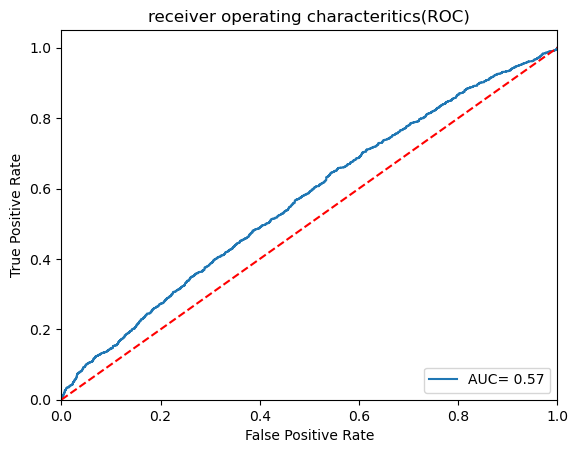

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

log_roc_auc= roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, lr1.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC= %0.2f' % auc(fpr, tpr))
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('receiver operating characteritics(ROC)')
plt.legend(loc="lower right")
plt.show()

In [24]:
from imblearn.under_sampling import TomekLinks
tl=TomekLinks(sampling_strategy='majority')
X_resample_tl, y_resample_tl = tl.fit_resample(X, y)
len(X_resample_tl)

168236